<a href="https://colab.research.google.com/github/monya217/BreastCancer/blob/main/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Project Submission
Team Members -


1.   Manasvi Jindal 03101192022 AI/ML IGDTUW
2.   Monya Mehta 03401192022 AI/ML IGDTUW




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import img_to_array

In [ ]:
import os

In [ ]:
!unzip /content/drive/MyDrive/breastcancer.zip

Archive:  /content/drive/MyDrive/breastcancer.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: D

In [ ]:
#manasvi
path = '/content/Dataset_BUSI_with_GT/'

In [ ]:
#monya
path = '/content/drive/MyDrive/Dataset_BUSI_with_GT/'

Helper function to get the index for real image and mask.

In [ ]:
def num (image) :

    val = 0

    for i in range(len(image)) :
        if image[i] == '(' :
            while True :
                i += 1
                if image[i] == ')' :
                    break
                val = (val*10) + int(image[i])
            break

    return val

Initialize the arrays for benign, normal and malignant tumors, both real and mask. As already given the number of samples in benign, normal & malignant are 437, 133 and 210 respectively.

In [ ]:
img_b, mask_b = np.zeros((437, 128, 128, 1)), np.zeros((437, 128, 128, 1))
img_n, mask_n = np.zeros((133, 128, 128, 1)), np.zeros((133, 128, 128, 1))
img_m, mask_m = np.zeros((210, 128, 128, 1)), np.zeros((210, 128, 128, 1))

In [ ]:
for i, tumor_type in enumerate(os.listdir(path)) :
    for image in os.listdir(path+tumor_type+'/') :
        p = os.path.join(path+tumor_type, image)
        img = cv2.imread(p,cv2.IMREAD_GRAYSCALE)           # read image as  grayscale

        if image[-5] == ')' :

            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)

            if image[0] == 'b' :
                img_b[num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                           # to X as benign , normal
                img_n[num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                img_m[num(image)-1]+= img_to_array(pil_img)
        else :
            img = cv2.resize(img,(128,128))
            pil_img = Image.fromarray (img)

            if image[0] == 'b' :
                mask_b[num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                           # mask to y.
                mask_n[num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                mask_m[num(image)-1]+= img_to_array(pil_img)


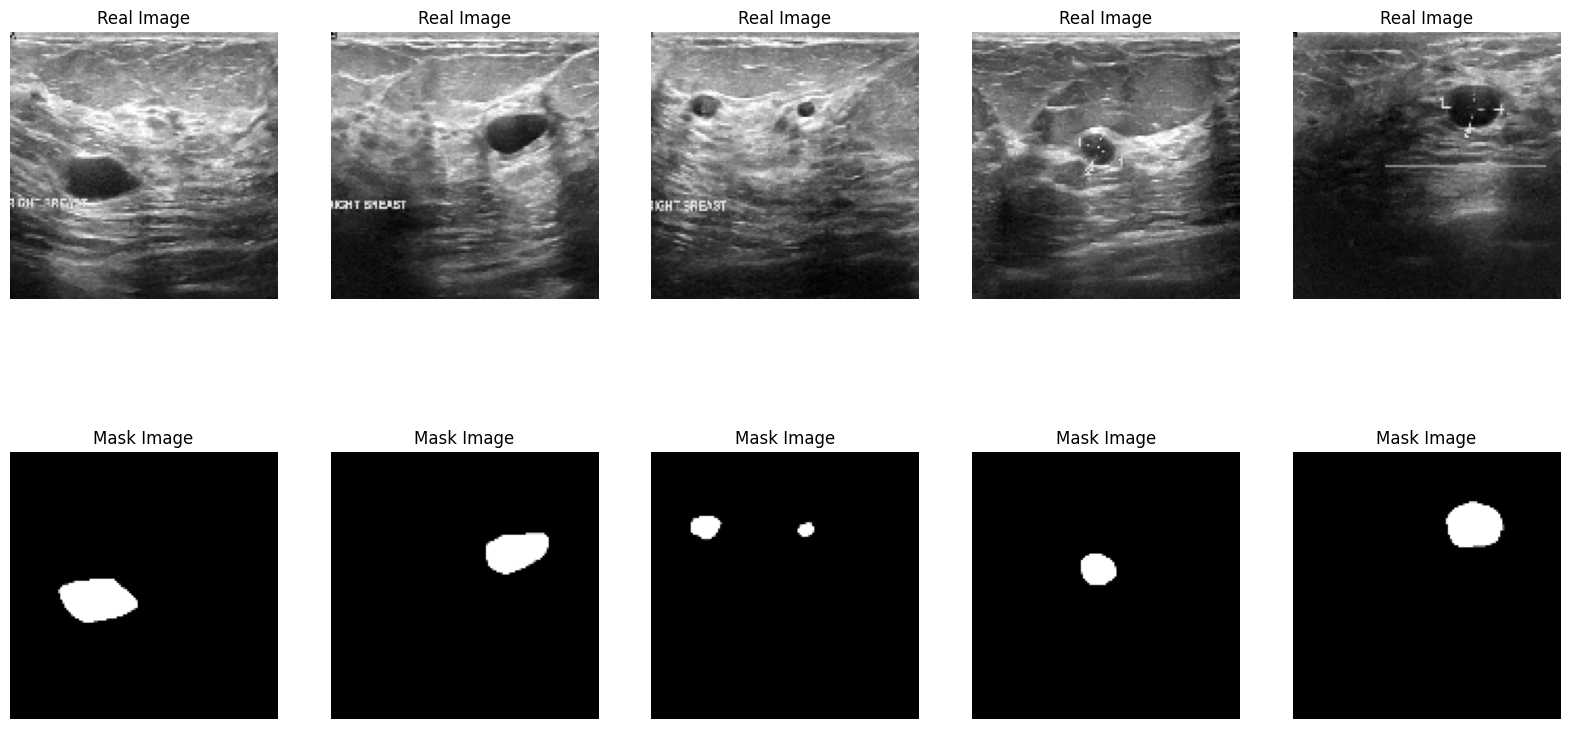

In [ ]:
plt.figure(figsize = (20,10))

for i in range(5) :
    plt.subplot(2,5,i+1)
    plt.imshow(img_b[i+1], 'gray')
    plt.title('Real Image')
    plt.axis('off')

for i in range(5) :
    plt.subplot(2,5,i+6)
    plt.imshow(mask_b[i+1], 'gray')
    plt.title('Mask Image')
    plt.axis('off')
plt.show()

Create datasets for model training and validation

In [ ]:
scan = np.concatenate((img_b, img_n, img_m), axis = 0)
mask = np.concatenate((mask_b, mask_n, mask_m), axis = 0)

In [ ]:
scan /= 255.0
mask /= 255.0

In [ ]:
print(scan.shape)
print(mask.shape)

(780, 128, 128, 1)
(780, 128, 128, 1)


In [ ]:
print(scan.max())
print(scan.min())

1.0
0.0


In [ ]:
print(mask.max())
print(mask.min())

2.0
0.0


In [ ]:
scan[scan > 1.0] = 1.0
mask[mask > 1.0] = 1.0

In [ ]:
print(scan.max())
print(scan.min())
print(mask.max())
print(mask.min())

1.0
0.0
1.0
0.0


Visualization

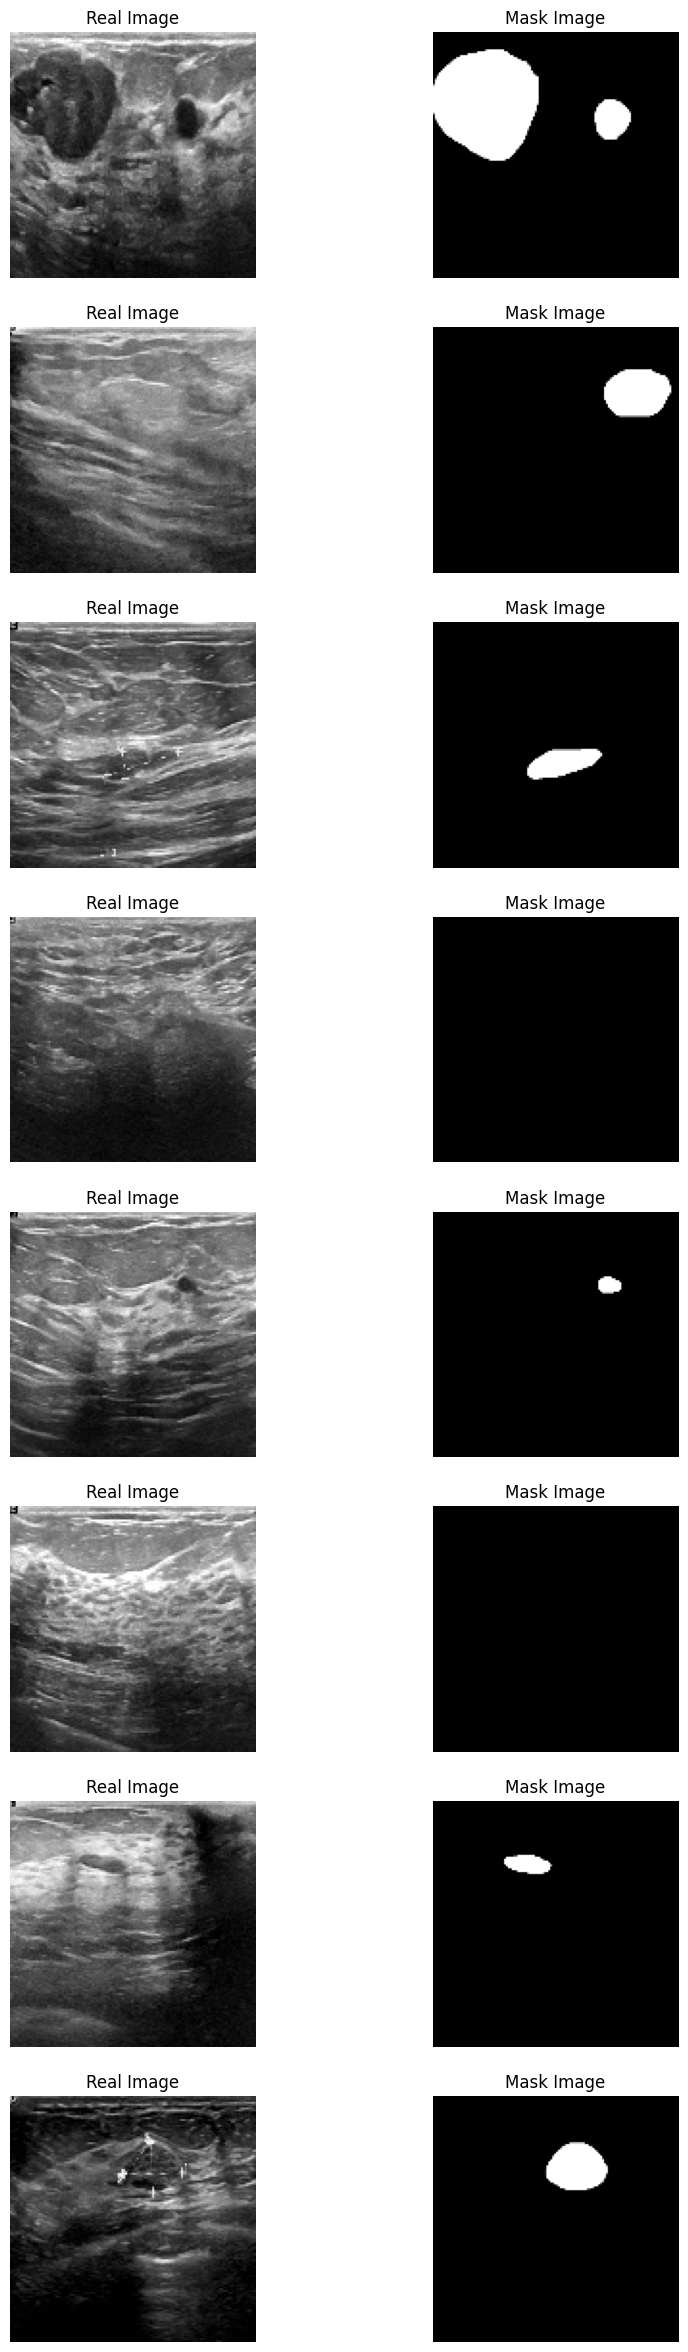

In [ ]:
plt.figure(figsize = (10,30))
i = 0
while i < 16 :

    x = np.random.randint(0,780)

    plt.subplot(8,2,i+1)
    plt.imshow(scan[x],'gray')
    plt.title('Real Image')
    plt.axis('off')

    plt.subplot(8,2,i+2)
    plt.imshow(mask[x],'gray')
    plt.title('Mask Image')
    plt.axis('off')

    i += 2
plt.show()

Train test split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
scan_train, scan_test, mask_train, mask_test = train_test_split(scan, mask, test_size = 0.05, random_state = 1)

In [ ]:
print(scan_train.shape)
print(mask_train.shape)

(741, 128, 128, 1)
(741, 128, 128, 1)


In [ ]:
print(scan_test.shape)
print(mask_test.shape)

(39, 128, 128, 1)
(39, 128, 128, 1)


Model Creation U-net

In [ ]:
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Concatenate
from keras.layers import MaxPooling2D
from keras.layers import Conv2DTranspose

from keras import Model

Contracting path

In [ ]:
inply = Input((128, 128, 1,))

conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(inply)
conv1 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv1)
pool1 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv1)
drop1 = Dropout(0.2)(pool1)

conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(drop1)
conv2 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv2)
pool2 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv2)
drop2 = Dropout(0.2)(pool2)

conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(drop2)
conv3 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv3)
pool3 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv3)
drop3 = Dropout(0.2)(pool3)

conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(drop3)
conv4 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv4)
pool4 = MaxPooling2D((2,2), strides = 2, padding = 'same')(conv4)
drop4 = Dropout(0.2)(pool4)

Bottleneck layer

In [ ]:
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(drop4)
convm = Conv2D(2**10, (3,3), activation = 'relu', padding = 'same')(convm)

Expanding layer

In [ ]:
tran5 = Conv2DTranspose(2**9, (2,2), strides = 2, padding = 'valid', activation = 'relu')(convm)
conc5 = Concatenate()([tran5, conv4])
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conc5)
conv5 = Conv2D(2**9, (3,3), activation = 'relu', padding = 'same')(conv5)
drop5 = Dropout(0.1)(conv5)

tran6 = Conv2DTranspose(2**8, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop5)
conc6 = Concatenate()([tran6, conv3])
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conc6)
conv6 = Conv2D(2**8, (3,3), activation = 'relu', padding = 'same')(conv6)
drop6 = Dropout(0.1)(conv6)

tran7 = Conv2DTranspose(2**7, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop6)
conc7 = Concatenate()([tran7, conv2])
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conc7)
conv7 = Conv2D(2**7, (3,3), activation = 'relu', padding = 'same')(conv7)
drop7 = Dropout(0.1)(conv7)

tran8 = Conv2DTranspose(2**6, (2,2), strides = 2, padding = 'valid', activation = 'relu')(drop7)
conc8 = Concatenate()([tran8, conv1])
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conc8)
conv8 = Conv2D(2**6, (3,3), activation = 'relu', padding = 'same')(conv8)
drop8 = Dropout(0.1)(conv8)

In [ ]:
outly = Conv2D(2**0, (1,1), activation = 'relu', padding = 'same')(drop8)
model = Model(inputs = inply, outputs = outly, name = 'U-net')

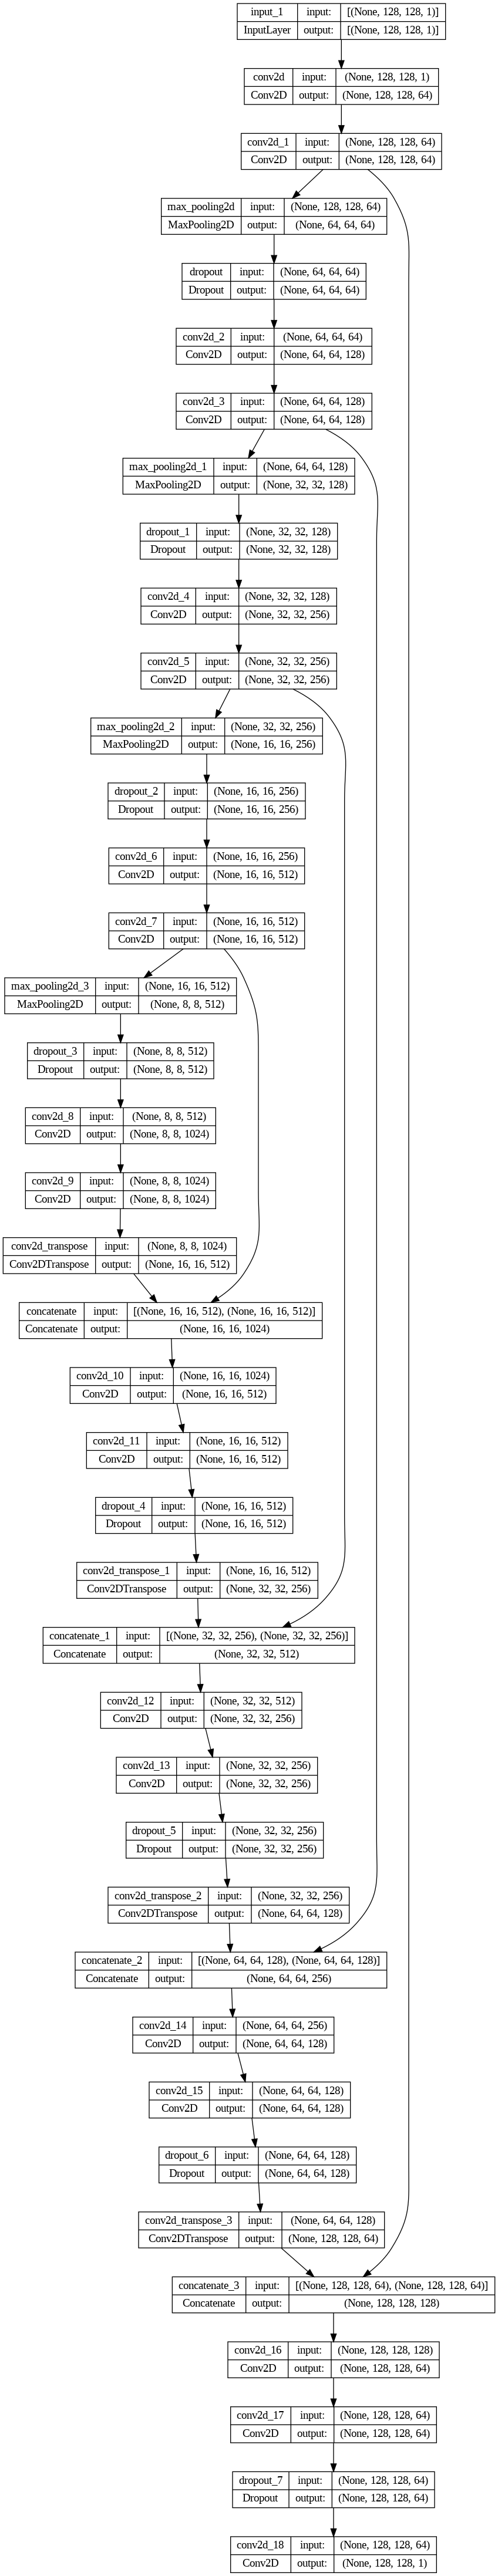

In [ ]:
keras.utils.plot_model(model, './model_plot.png', show_shapes = True)

Loss function

In [ ]:
from keras.losses import BinaryCrossentropy

Training

In [ ]:
model.compile(loss = BinaryCrossentropy(), optimizer = keras.optimizers.Adam(learning_rate = 0.00005))
print(model.summary())

Model: "U-net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
from keras.callbacks import ModelCheckpoint


In [ ]:
checkp = ModelCheckpoint('./cancer_image_model_final.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)


In [ ]:
history = model.fit(scan_train, mask_train, epochs = 100, batch_size = 32, validation_data = (scan_test, mask_test), callbacks = [checkp])

Epoch 1/100
24/24 [==============================] - ETA: 0s - loss: 0.4646
Epoch 1: val_loss improved from inf to 0.30725, saving model to ./cancer_image_model_final.h5
24/24 [==============================] - 47s 764ms/step - loss: 0.4646 - val_loss: 0.3072
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 0.2992
Epoch 2: val_loss improved from 0.30725 to 0.28532, saving model to ./cancer_image_model_final.h5
24/24 [==============================] - 12s 485ms/step - loss: 0.2992 - val_loss: 0.2853
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 0.2738
Epoch 3: val_loss improved from 0.28532 to 0.24992, saving model to ./cancer_image_model_final.h5
24/24 [==============================] - 12s 486ms/step - loss: 0.2738 - val_loss: 0.2499
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 0.2664
Epoch 4: val_loss did not improve from 0.24992
24/24 [==============================] - 11s 441ms/step - loss: 0.2664 - val_loss: 0.2655

Model Performance

Text(0.5, 1.0, 'Losses vs Epochs')

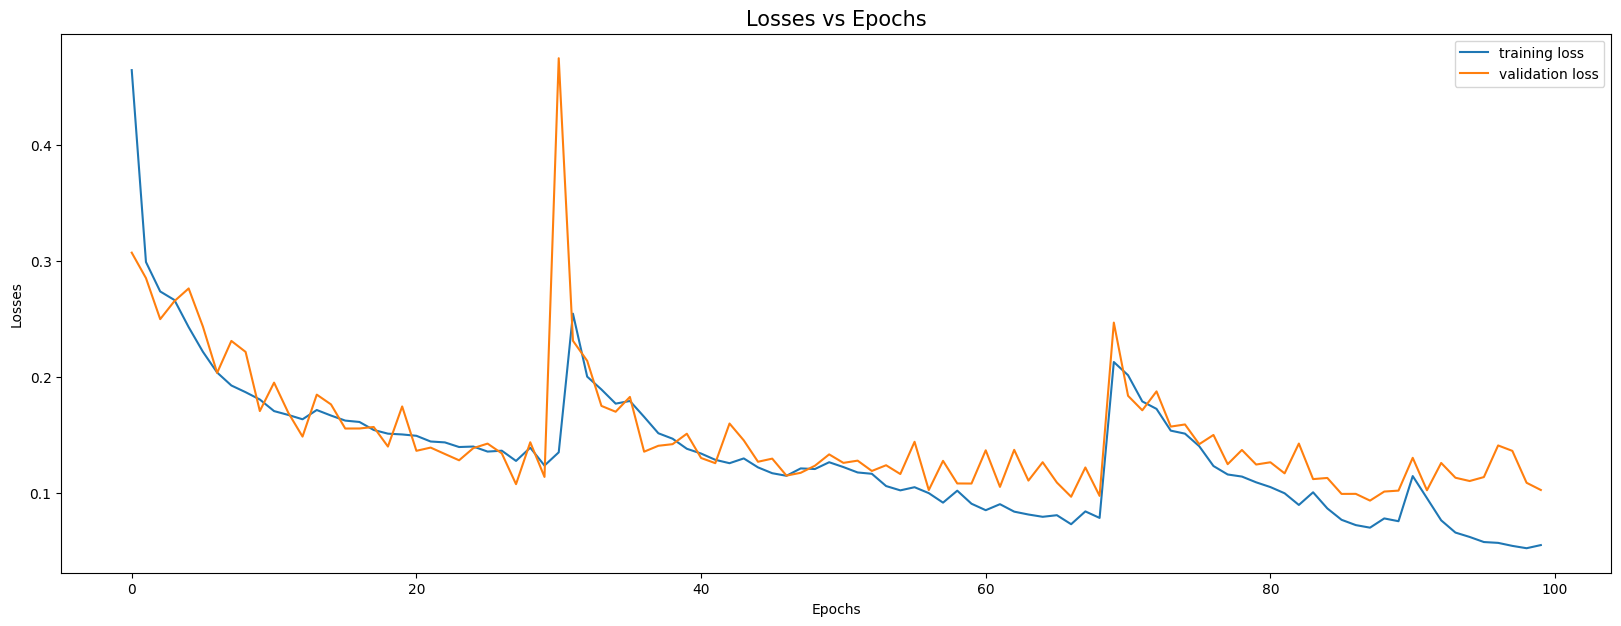

In [ ]:
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs', fontsize = 15)

In [ ]:
from keras.models import load_model
model = load_model('./cancer_image_model_final.h5')

In [ ]:
mask_pred = model.predict(scan_test)

2/2 [==============================] - 1s 149ms/step


In [ ]:
print(mask_pred.shape)

(39, 128, 128, 1)


Predictions

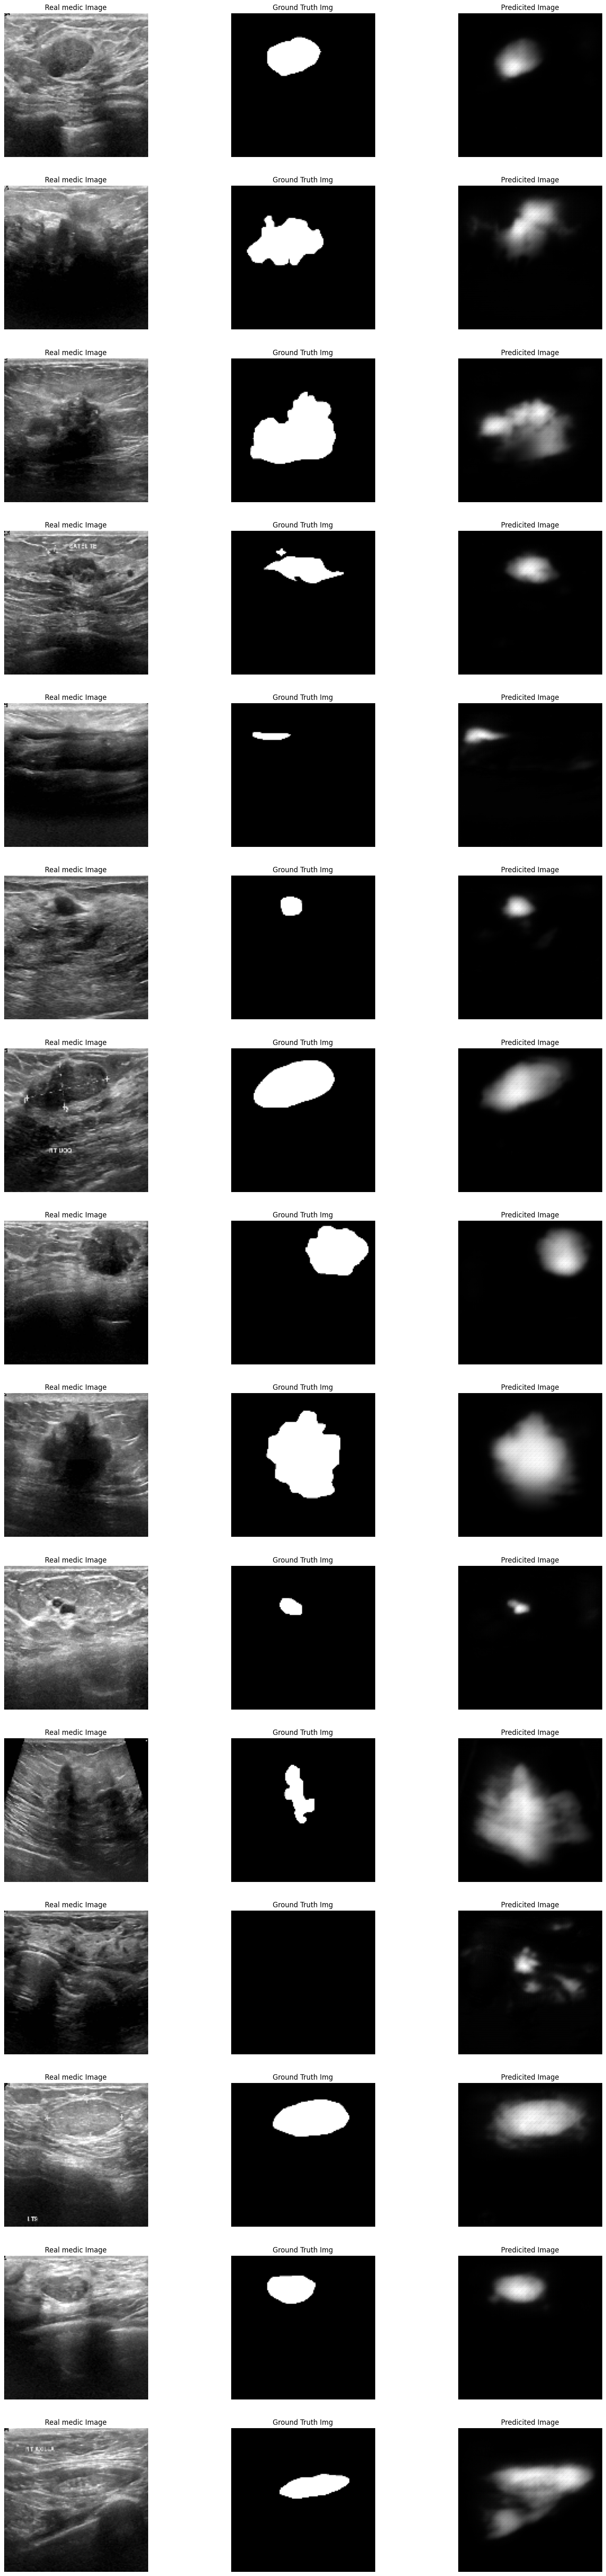

In [ ]:
plt.figure(figsize = (20,80))

i = 0
x = 0
while i < 45 :

    plt.subplot(15,3,i+1)
    plt.imshow(scan_test[x], 'gray')
    plt.title('Real medic Image')
    plt.axis('off')

    plt.subplot(15,3,i+2)
    plt.imshow(mask_test[x], 'gray')
    plt.title('Ground Truth Img')
    plt.axis('off')

    plt.subplot(15,3,i+3)
    plt.imshow(mask_pred[x], 'gray')
    plt.title('Predicited Image')
    plt.axis('off')

    x += 1
    i += 3
plt.show()

Classifier

In [ ]:
os.listdir(path)

['normal', 'malignant', 'benign']

In [ ]:
info = [

    'malignant',
    'benign'
    'normal'
]

In [ ]:
#monya
info = ['normal', 'malignant', 'benign']

In [ ]:
path = '/content/Dataset_BUSI_with_GT/'

In [ ]:
#monya
path = '/content/drive/MyDrive/Dataset_BUSI_with_GT/'

In [ ]:
pro_img = []
labels = []

label_num = -1

for label_class in os.listdir(path) :

    new_path   = path + label_class
    label_num += 1

    for img in os.listdir(new_path) :
        if 'mask' not in img :

            labels.append(label_num)
            x = cv2.imread(path + label_class +'/'+img, cv2.IMREAD_GRAYSCALE)
            pro_img.append(img_to_array(Image.fromarray(cv2.resize(x, (128,128)))))

In [ ]:
pro_img = np.array(pro_img)
labels = np.array(labels)

In [ ]:
pro_img/= 255.0

In [ ]:
from keras.utils import to_categorical

In [ ]:
labels = to_categorical(labels)

In [ ]:
print(pro_img.shape)
print(labels.shape)

(780, 128, 128, 1)
(780, 3)


In [ ]:
print(pro_img.min())
print(pro_img.max())

0.0
1.0


(-0.5, 127.5, 127.5, -0.5)

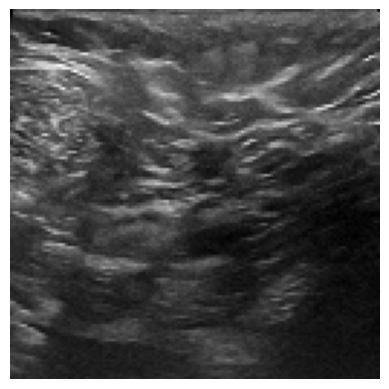

In [ ]:
plt.imshow(pro_img[0], 'gray')
plt.axis('off')

In [ ]:
from keras.models import load_model

In [ ]:
localize = load_model('./cancer_image_model_final.h5')

In [ ]:
M = localize.predict(pro_img)

25/25 [==============================] - 5s 190ms/step


0.0
5.1661444


(-0.5, 127.5, 127.5, -0.5)

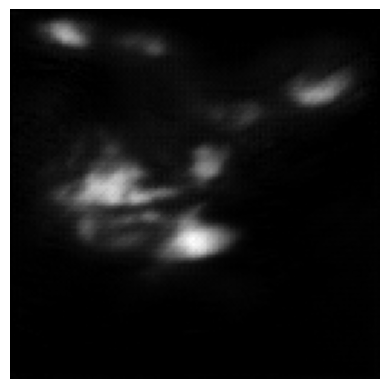

In [ ]:
print(M.min())
print(M.max())

plt.imshow(M[0], 'gray')
plt.axis('off')

Data distribution

In [ ]:
import pandas
import seaborn

Text(0.5, 1.0, 'Distribution of classes accross the entire dataset')

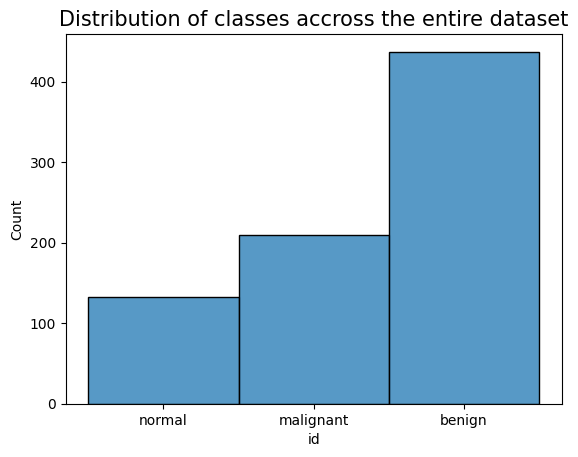

In [ ]:
seaborn.histplot(data = pandas.DataFrame({'id' : [info[p] for p in np.argmax(labels, axis = 1)]}), x = 'id')
plt.title('Distribution of classes accross the entire dataset', fontsize = 15)

train-test split

In [ ]:
pro_img_train, pro_img_test, labels_train, labels_test = train_test_split(M, labels, test_size = 0.1, shuffle = True, random_state = 1)

In [ ]:
print(pro_img_train.shape)
print(labels_train.shape)

(702, 128, 128, 1)
(702, 3)


In [ ]:
print(pro_img_test.shape)
print(labels_test.shape)

(78, 128, 128, 1)
(78, 3)


In [ ]:
from numpy.random import randint

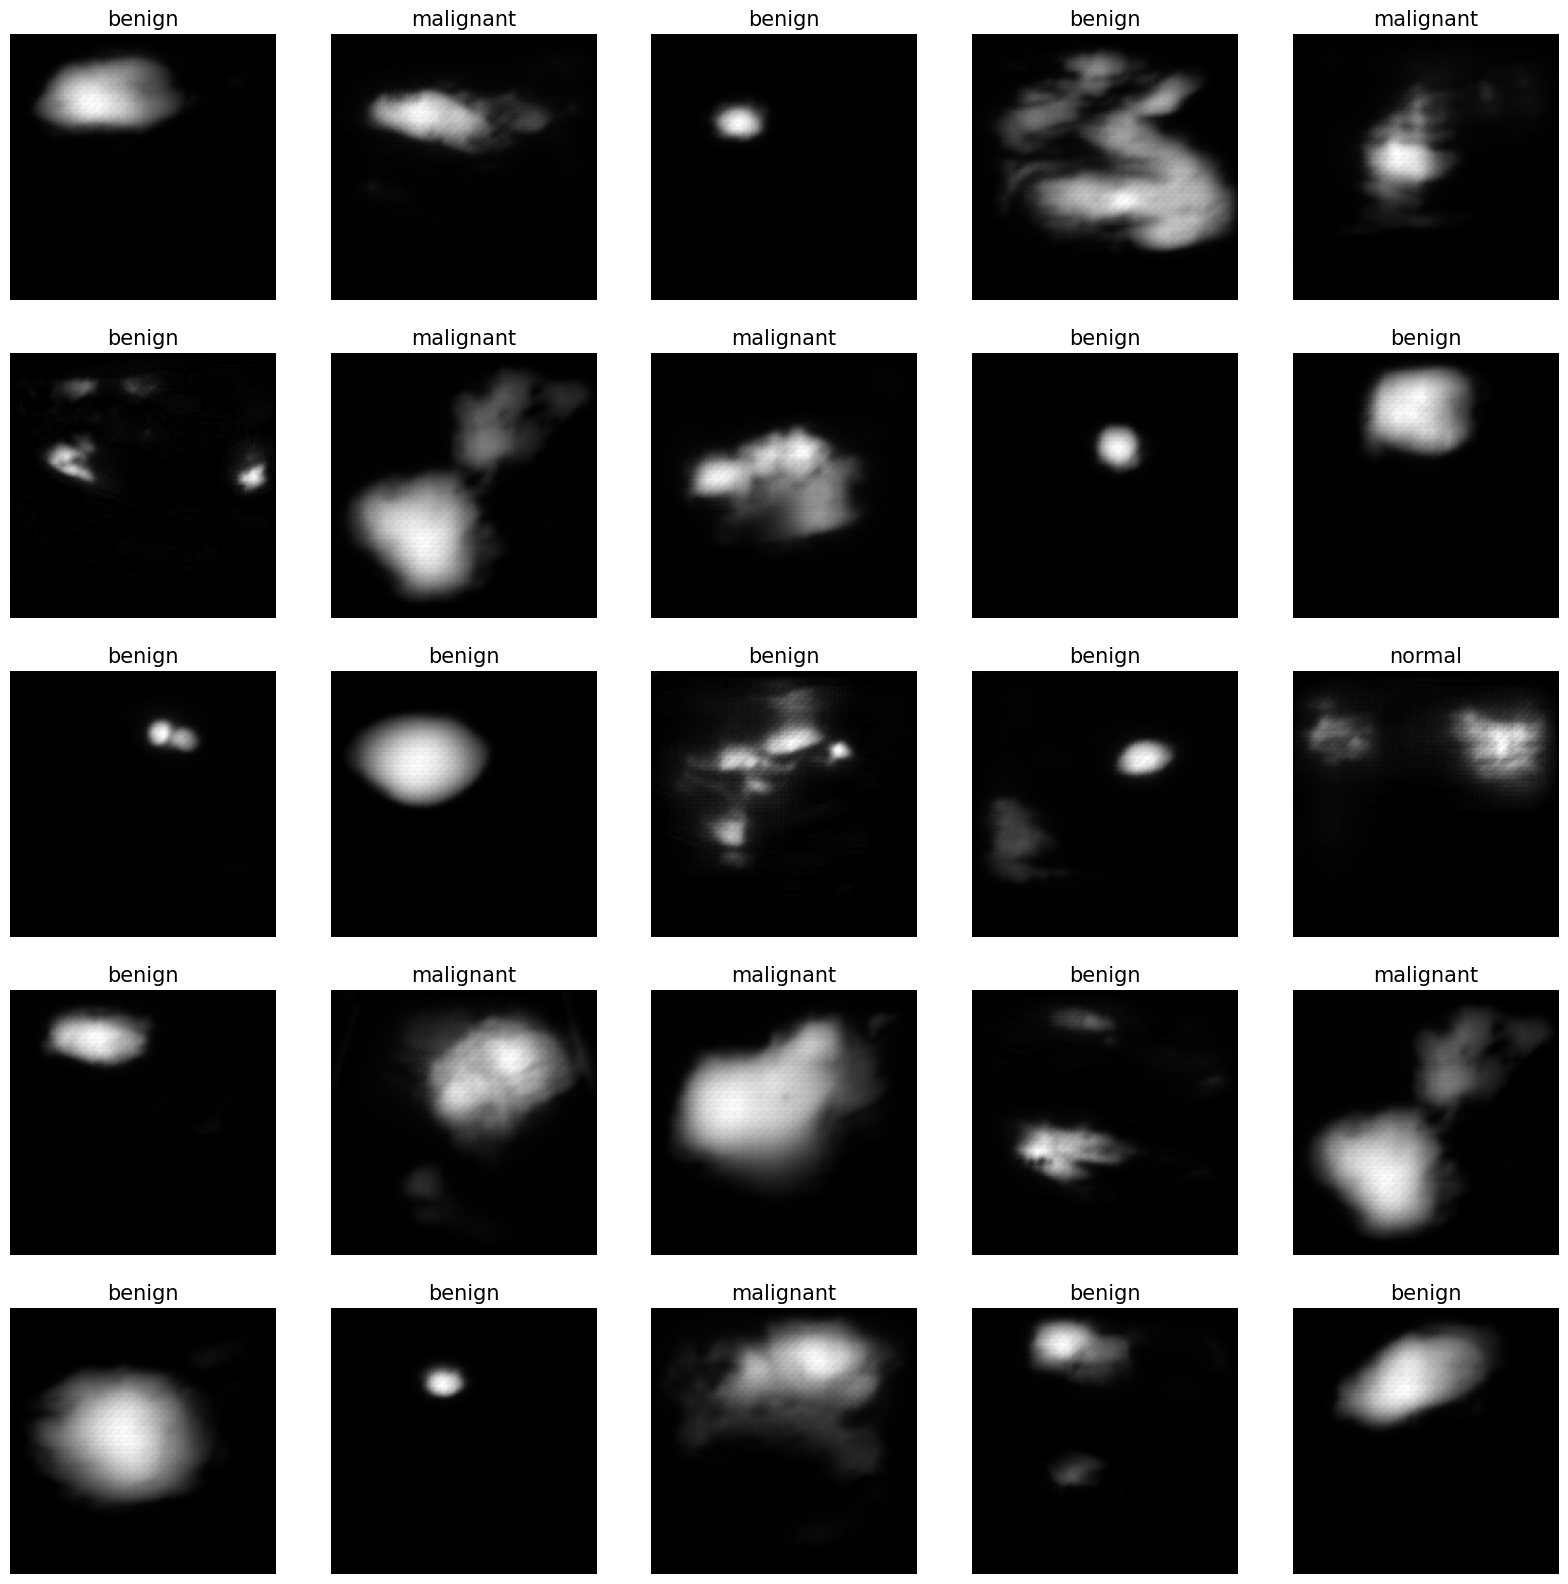

In [ ]:
plt.figure(figsize = (20,20))
i = 0
SIZE = 702
while i < 25 :

    x = randint(0, SIZE)
    plt.subplot(5,5,i+1)
    plt.imshow(M[x], 'gray')
    plt.title(f'{info[np.argmax(labels[x])]}', fontsize = 15)
    plt.axis('off')

    i += 1
plt.show()

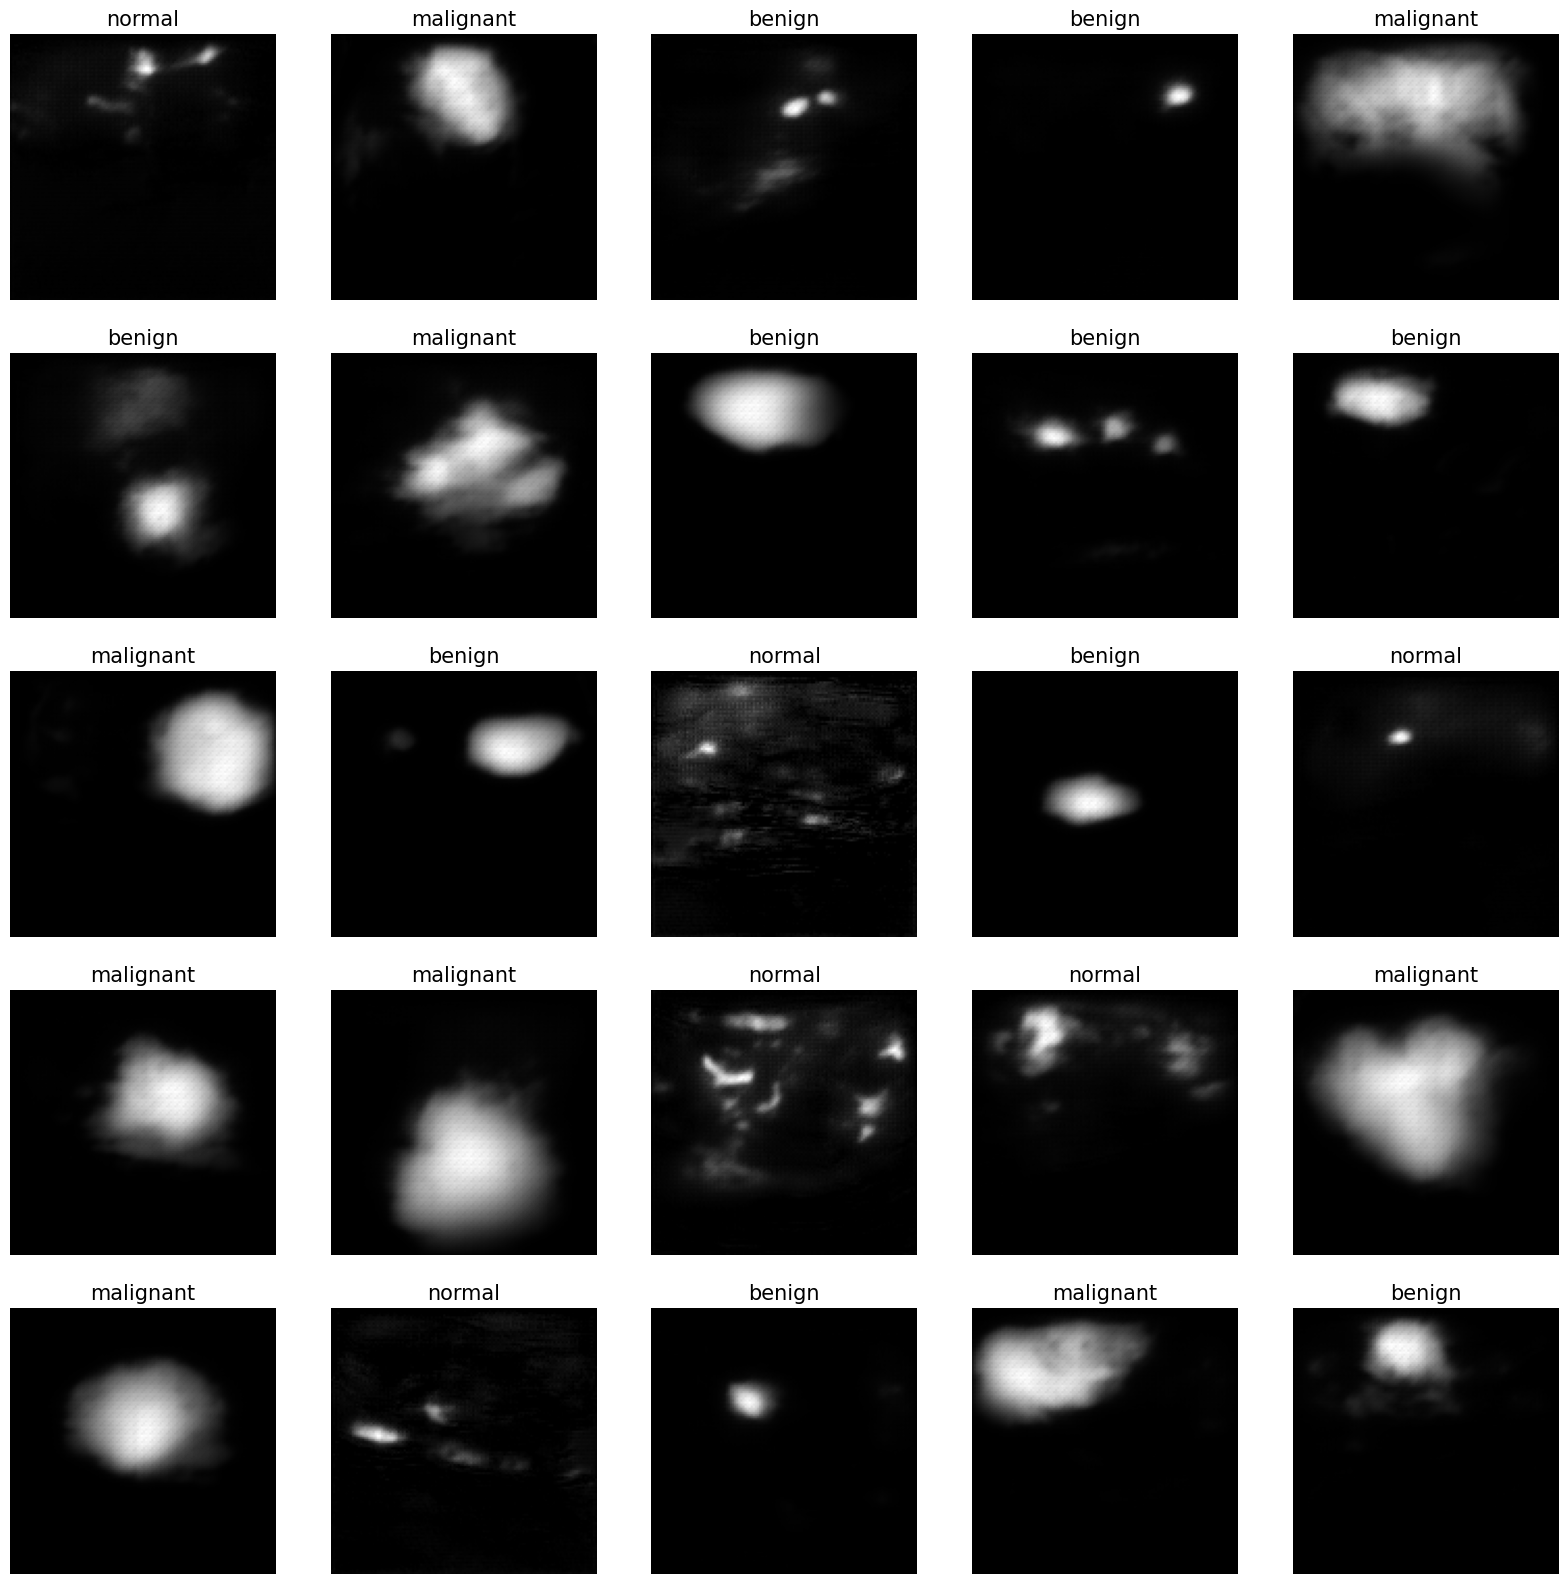

In [ ]:
plt.figure(figsize = (20,20))
i = 0
SIZE = 702
while i < 25 :

    x = randint(0, SIZE)
    plt.subplot(5,5,i+1)
    plt.imshow(pro_img_train[x], 'gray')
    plt.title(f'{info[np.argmax(labels_train[x])]}', fontsize = 15)
    plt.axis('off')

    i += 1
plt.show()

Data augmentation






In [ ]:
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_gen = ImageDataGenerator(
    horizontal_flip = True, rotation_range = 15, width_shift_range = [-10, 10],
    height_shift_range = [-10, 10], zoom_range = [0.80, 1.00])

In [ ]:
train_gen.fit(pro_img_train)

In [ ]:
pointer = train_gen.flow(pro_img_train, labels_train)

In [ ]:
trainX, trainy = pointer.next()

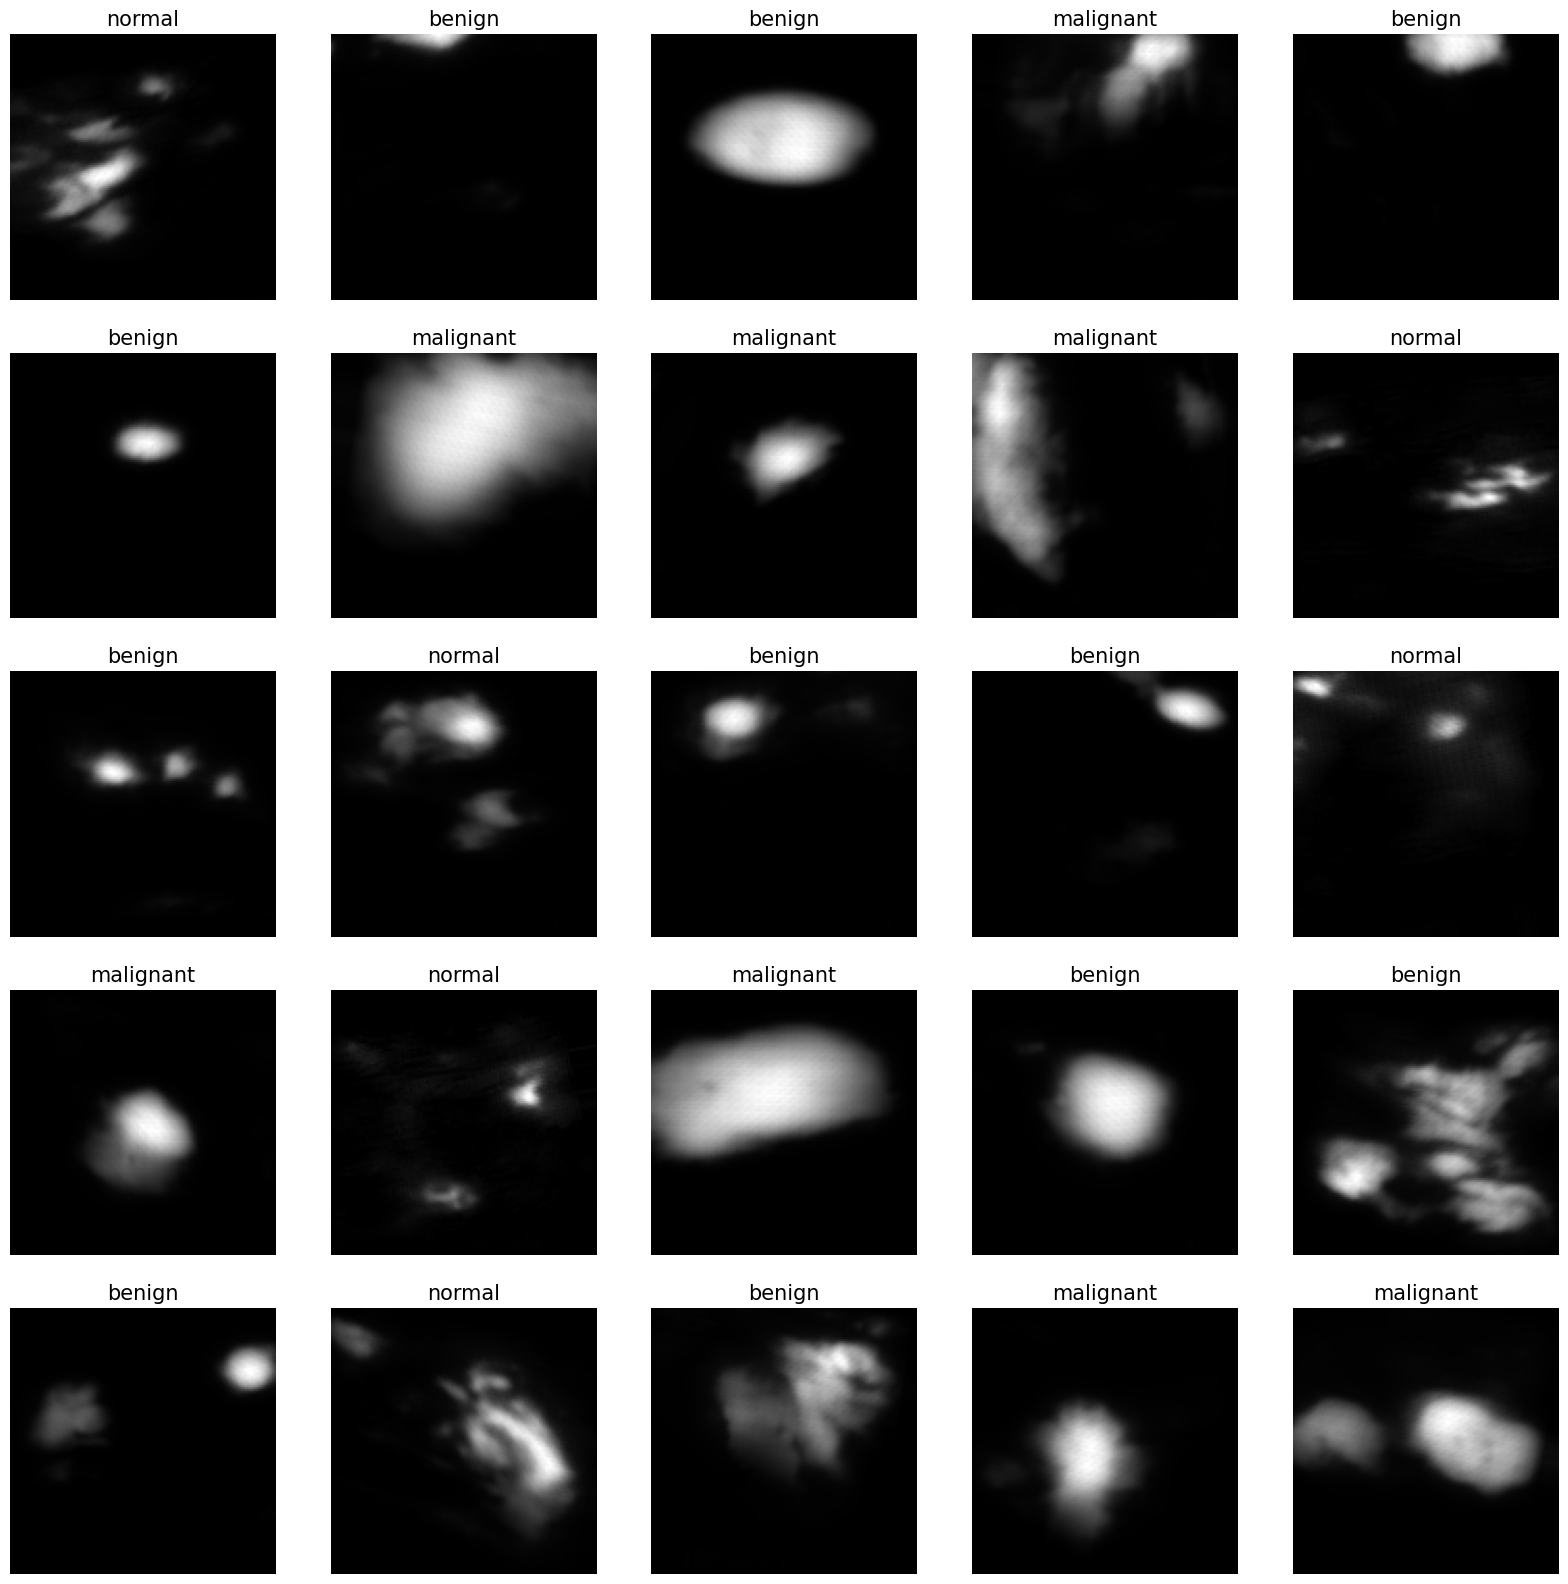

In [ ]:
plt.figure(figsize = (20,20))

i = 0

while i < 25 :

    plt.subplot(5, 5, i+1)
    plt.imshow(trainX[i], 'gray')
    plt.title(f'{info[np.argmax(trainy[i])]}', fontsize = 15)
    plt.axis('off')

    i += 1
plt.show()

make CNN model

In [ ]:
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
def conv_block (filterx) :

    model = Sequential()

    model.add(Conv2D(filterx, (3,3), strides = 1, padding = 'same', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(LeakyReLU())

    model.add(MaxPooling2D())

    return model

def dens_block (hiddenx) :

    model = Sequential()

    model.add(Dense(hiddenx, kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(LeakyReLU())

    return model

In [ ]:
def conv_block (filterx) :

    model = Sequential()

    model.add(Conv2D(filterx, (3,3), strides = 1, padding = 'same', kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(LeakyReLU())

    model.add(MaxPooling2D())

    return model

def dens_block (hiddenx) :

    model = Sequential()

    model.add(Dense(hiddenx, kernel_regularizer = 'l2'))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(LeakyReLU())

    return model

In [ ]:
def cnn (filter1, filter2, filter3, filter4, hidden1) :

    model = Sequential([

        Input((128,128,1,)),
        conv_block(filter1),
        conv_block(filter2),
        conv_block(filter3),
        conv_block(filter4),
        Flatten(),
        dens_block(hidden1),
        Dense(3, activation = 'softmax')
    ])

    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0005), metrics = ['accuracy'])

    return model

In [ ]:
model = cnn(32, 64, 128, 256, 32)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 32)        448       
                                                                 
 sequential_1 (Sequential)   (None, 32, 32, 64)        18752     
                                                                 
 sequential_2 (Sequential)   (None, 16, 16, 128)       74368     
                                                                 
 sequential_3 (Sequential)   (None, 8, 8, 256)         296192    
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 sequential_4 (Sequential)   (None, 32)                524448    
                                                                 
 dense_1 (Dense)             (None, 3)                

In [ ]:
from keras.utils import plot_model


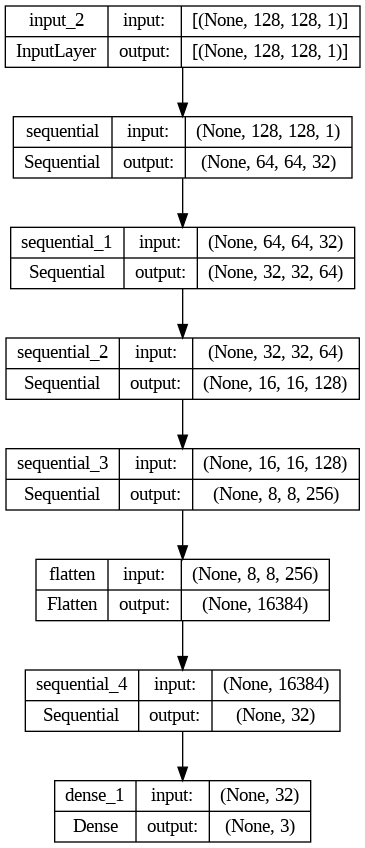

In [ ]:
plot_model(model, 'cancer_classify.png', show_shapes = True)

In [ ]:
checkp = ModelCheckpoint('./valid_classifier_final.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)

In [ ]:
history = model.fit(train_gen.flow(pro_img_train, labels_train, batch_size = 64), epochs = 400, validation_data = (pro_img_test, labels_test), callbacks = [checkp])

Epoch 1/400
11/11 [==============================] - ETA: 0s - loss: 4.7336 - accuracy: 0.5157
Epoch 1: val_loss improved from inf to 4.70144, saving model to ./valid_classifier_final.h5
11/11 [==============================] - 9s 542ms/step - loss: 4.7336 - accuracy: 0.5157 - val_loss: 4.7014 - val_accuracy: 0.1795
Epoch 2/400
11/11 [==============================] - ETA: 0s - loss: 4.3872 - accuracy: 0.5997
Epoch 2: val_loss improved from 4.70144 to 4.55559, saving model to ./valid_classifier_final.h5
11/11 [==============================] - 1s 129ms/step - loss: 4.3872 - accuracy: 0.5997 - val_loss: 4.5556 - val_accuracy: 0.1795
Epoch 3/400
11/11 [==============================] - ETA: 0s - loss: 3.9984 - accuracy: 0.6610
Epoch 3: val_loss improved from 4.55559 to 4.36032, saving model to ./valid_classifier_final.h5
11/11 [==============================] - 1s 125ms/step - loss: 3.9984 - accuracy: 0.6610 - val_loss: 4.3603 - val_accuracy: 0.1795
Epoch 4/400
11/11 [===================

Text(0.5, 1.0, 'Loss val wrt. Epochs')

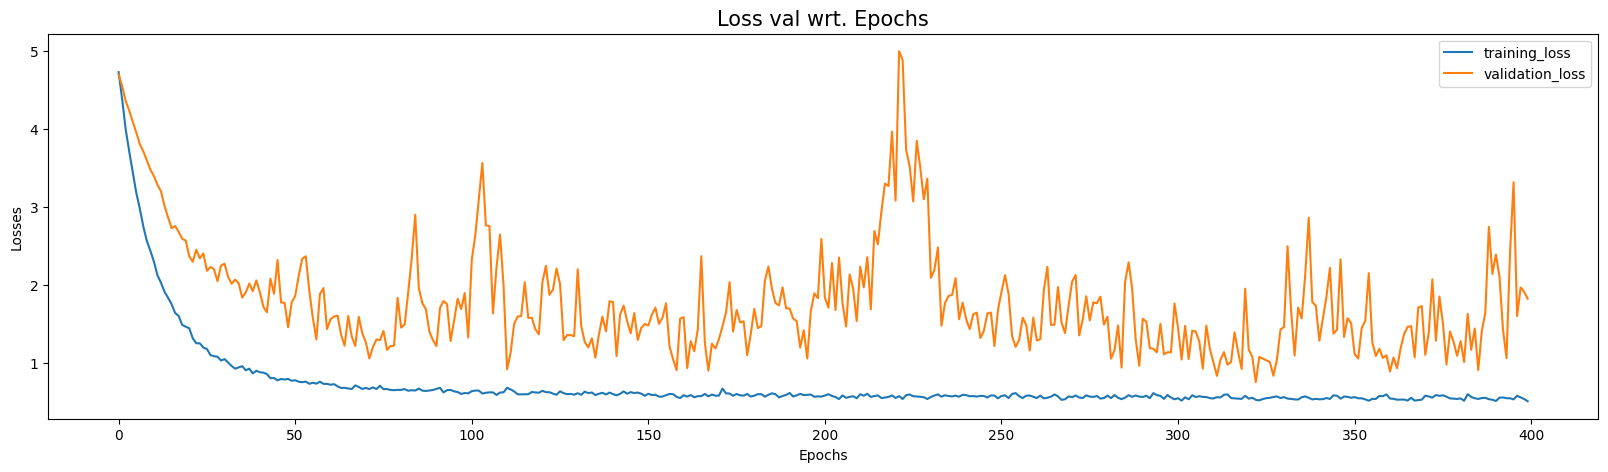

In [ ]:
plt.figure(figsize = (20,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_loss', 'validation_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Loss val wrt. Epochs', fontsize = 15)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
labels_pred = model.predict(pro_img_test)

3/3 [==============================] - 0s 10ms/step


In [ ]:
labels_pred = np.argmax(labels_pred, axis = 1)
labels_test = np.argmax(labels_test, axis = 1)

In [ ]:
print('Accuracy : ' + str(accuracy_score(labels_test, labels_pred)))
print(classification_report(labels_test, labels_pred, target_names = info))

Accuracy : 0.21794871794871795
              precision    recall  f1-score   support

      normal       0.00      0.00      0.00        14
   malignant       0.22      1.00      0.37        17
      benign       0.00      0.00      0.00        47

    accuracy                           0.22        78
   macro avg       0.07      0.33      0.12        78
weighted avg       0.05      0.22      0.08        78



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(labels_test,labels_pred)

Text(0.5, 63.222222222222186, 'Predicted')

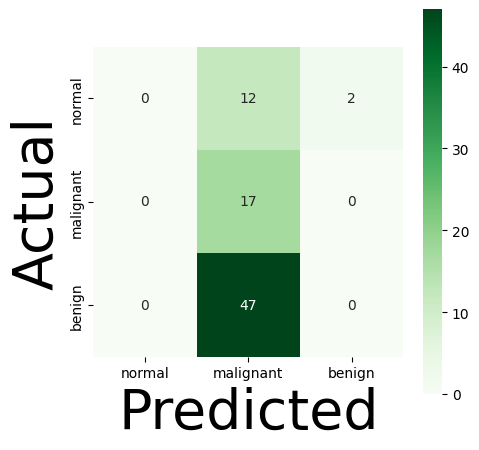

In [ ]:
plt.figure(figsize = (5,5))
ax = seaborn.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels = info, yticklabels = info)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
image_path = [
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (110).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (100).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (101).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/benign/benign (107).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/normal/normal (101).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/normal/normal (111).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/normal/normal (106).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/malignant/malignant (115).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/malignant/malignant (111).png',
    '/content/drive/MyDrive/Dataset_BUSI_with_GT/malignant/malignant (110).png',
]

In [ ]:
localize = load_model('./cancer_image_model_final.h5')

In [ ]:
testX = []
for img in image_path :
    testX.append(img_to_array(Image.fromarray(cv2.resize(cv2.imread(img, cv2.IMREAD_GRAYSCALE), (128,128)))))

In [ ]:
testX = np.array(testX)
testX/= 255.0

In [ ]:
print(testX.shape)
print(f'Minimum : {testX.min()}')
print(f'Maximum : {testX.max()}')

(10, 128, 128, 1)
Minimum : 0.0
Maximum : 1.0


(-0.5, 127.5, 127.5, -0.5)

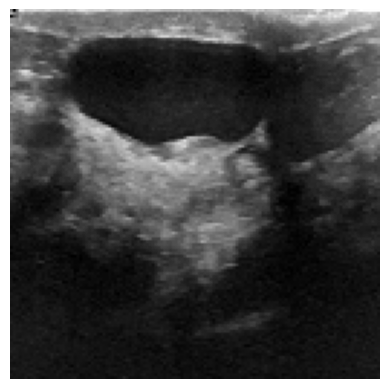

In [ ]:
plt.imshow(testX[0], 'gray')
plt.axis('off')

In [ ]:

predY = localize.predict(testX)

1/1 [==============================] - 2s 2s/step


In [ ]:
print(predY.shape)

(10, 128, 128, 1)


(-0.5, 127.5, 127.5, -0.5)

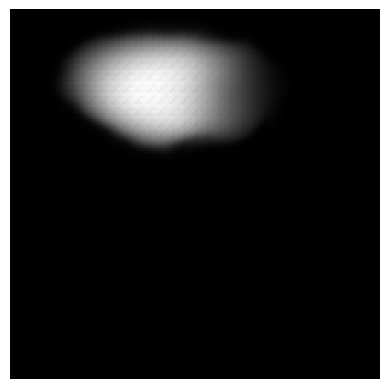

In [ ]:
plt.imshow(predY[0], 'gray')
plt.axis('off')

In [ ]:
print(predY.min())
print(predY.max())

0.0
2.1803992


In [ ]:
pred_label = model.predict(predY)

1/1 [==============================] - 0s 150ms/step


[1 1 1 1 1 2 1 1 1 1]


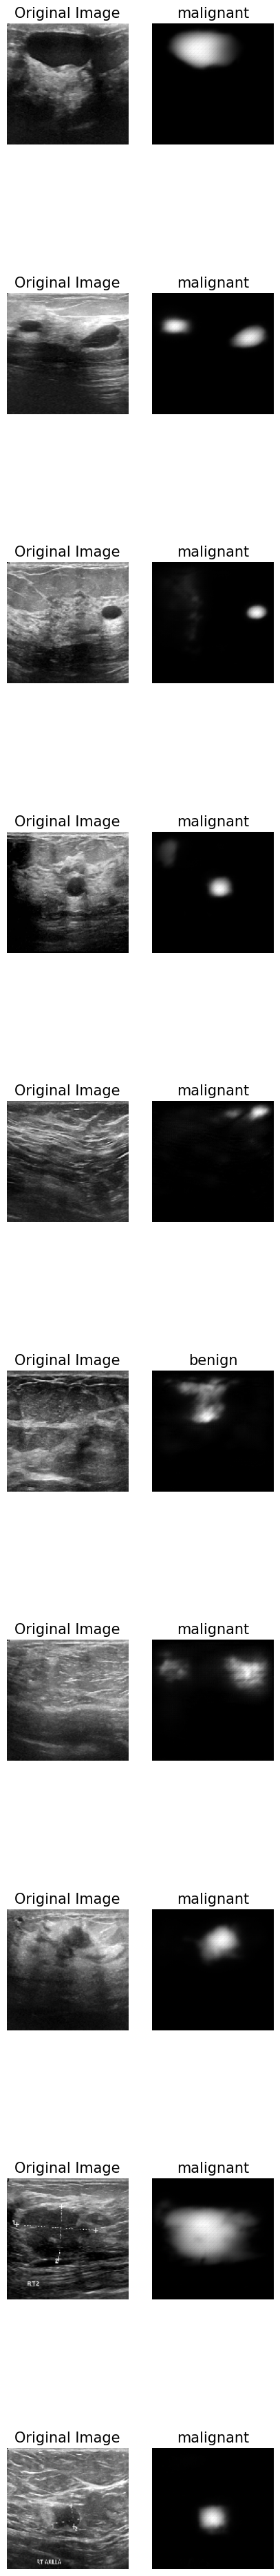

In [ ]:
print(np.argmax(pred_label, axis = 1))
plt.figure(figsize = (5,50))

i = 0
j = 0
while i < 20 :

    plt.subplot(10,2,i+1)
    plt.imshow (testX[j], 'gray')
    plt.title('Original Image', fontsize = 15)
    plt.axis('off')

    plt.subplot(10,2,i+2)
    plt.imshow (predY[j], 'gray')
    plt.title(f'{info[np.argmax(pred_label[j])]}', fontsize = 15)
    plt.axis('off')

    j += 1
    i += 2
plt.show()